# Load LFP

In [2]:
import spikeinterface.full as si
import spikeinterface.widgets as sw
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import signal
from scipy.fft import fft, fftfreq
from scipy.signal import stft
import pywt
import os
from tqdm import tqdm

mice = '20250310_VN_control'# 20250310_VN_control 20250310_VN_harmaline  20250310_VN_tremor
base_folder = Path(f'/data1/zhangyuhao/xinchao_data/NP2/{mice}')

recording_loaded = si.load(base_folder / 'LFP')
recording_loaded

BinaryFolderRecording: 384 channels - 29999.893830 Hz - 1 segments - 28,287,518 samples 
                       942.92s (15.72 minutes) - int16 dtype - 20.23 GiB

In [4]:
print(f'Loaded channels ids: {recording_loaded.get_channel_ids()}')
print(f'Channel groups after loading: {recording_loaded.get_channel_groups()}')

traces = recording_loaded.get_traces(segment_index=0)
traces = traces.T
traces

Loaded channels ids: ['imec0.ap#AP0' 'imec0.ap#AP1' 'imec0.ap#AP2' 'imec0.ap#AP3'
 'imec0.ap#AP4' 'imec0.ap#AP5' 'imec0.ap#AP6' 'imec0.ap#AP7'
 'imec0.ap#AP8' 'imec0.ap#AP9' 'imec0.ap#AP10' 'imec0.ap#AP11'
 'imec0.ap#AP12' 'imec0.ap#AP13' 'imec0.ap#AP14' 'imec0.ap#AP15'
 'imec0.ap#AP16' 'imec0.ap#AP17' 'imec0.ap#AP18' 'imec0.ap#AP19'
 'imec0.ap#AP20' 'imec0.ap#AP21' 'imec0.ap#AP22' 'imec0.ap#AP23'
 'imec0.ap#AP24' 'imec0.ap#AP25' 'imec0.ap#AP26' 'imec0.ap#AP27'
 'imec0.ap#AP28' 'imec0.ap#AP29' 'imec0.ap#AP30' 'imec0.ap#AP31'
 'imec0.ap#AP32' 'imec0.ap#AP33' 'imec0.ap#AP34' 'imec0.ap#AP35'
 'imec0.ap#AP36' 'imec0.ap#AP37' 'imec0.ap#AP38' 'imec0.ap#AP39'
 'imec0.ap#AP40' 'imec0.ap#AP41' 'imec0.ap#AP42' 'imec0.ap#AP43'
 'imec0.ap#AP44' 'imec0.ap#AP45' 'imec0.ap#AP46' 'imec0.ap#AP47'
 'imec0.ap#AP48' 'imec0.ap#AP49' 'imec0.ap#AP50' 'imec0.ap#AP51'
 'imec0.ap#AP52' 'imec0.ap#AP53' 'imec0.ap#AP54' 'imec0.ap#AP55'
 'imec0.ap#AP56' 'imec0.ap#AP57' 'imec0.ap#AP58' 'imec0.ap#AP59'
 'imec0.ap#AP6

array([[15, 11, 13, ...,  5,  4,  4],
       [10,  6,  7, ...,  6,  5,  5],
       [13, 10, 11, ...,  5,  4,  4],
       ...,
       [ 0, 10,  9, ..., -2, -3, -2],
       [-2,  2,  3, ...,  0,  0,  0],
       [-1,  7,  8, ..., -3, -3, -2]], dtype=int16)

# FFT Overlap Channel truncated times

KeyboardInterrupt: 

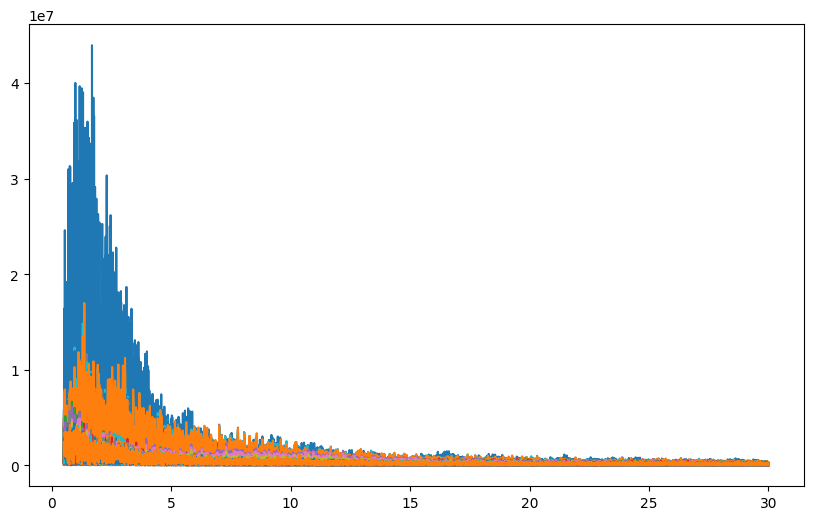

In [6]:
fs = 30000  # 30 kHz  
start_point = 7200000  # 7200000 is 240s 每240s算一次
end_point = 7200000*2
start_time = start_point / fs
end_time = end_point / fs
traces_trunc = traces[:, start_point:end_point]  # 0-2000000, 2000000-4000000, 4000000-6000000, 6000000-8000000
# create path
FFT_save_path = f'/home/zhangyuhao/Desktop/Result/ET/LFP_FFT/{mice}/{start_time}s-{end_time}s'
os.makedirs(FFT_save_path, exist_ok=True)
# Perform FFT for each row
fft_results = np.abs(fft(traces_trunc, axis=1))
frequencies = fftfreq(traces_trunc.shape[1], 1 / fs)
# Filter frequencies between 0.5Hz and 30Hz
freq_mask = (frequencies >= 0.5) & (frequencies <= 30)
# Plot frequency spectrum for all rows in one figure
plt.figure(figsize=(10, 6))
for i in range(traces_trunc.shape[0]):
    plt.plot(frequencies[freq_mask], fft_results[i, freq_mask])
plt.title('Frequency Spectrum (0.5Hz to 30Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.savefig(os.path.join(FFT_save_path, f'FFT_ch_overlap.png'), dpi=150)
plt.close()

# FFT Each channel truncated times

In [48]:
fs = 30000  # 30 kHz
start_point = 10000000
end_point = 11000000
start_time = start_point / fs
end_time = end_point / fs
traces_trunc = traces[:, start_point:end_point]  # 0-2000000, 2000000-4000000, 4000000-6000000, 6000000-8000000
# create path
FFT_save_path = f'/home/zhangyuhao/Desktop/Result/ET/LFP_FFT/{mice}/{start_time}s-{end_time}s'
os.makedirs(FFT_save_path, exist_ok=True)
# Perform FFT for each row
fft_results = np.abs(fft(traces_trunc, axis=1))
frequencies = fftfreq(traces_trunc.shape[1], 1 / fs)
# Filter frequencies between 0.5Hz and 30Hz
freq_mask = (frequencies >= 0.5) & (frequencies <= 30)
# Plot frequency spectrum for all rows in one figure
for i in range(traces_trunc.shape[0]):
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies[freq_mask], fft_results[i, freq_mask])
    plt.title('Frequency Spectrum (0.5Hz to 30Hz)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.savefig(os.path.join(FFT_save_path, f'channel_{i}_FFT.png'), dpi=150)
    plt.close()

# Load Processed Marker

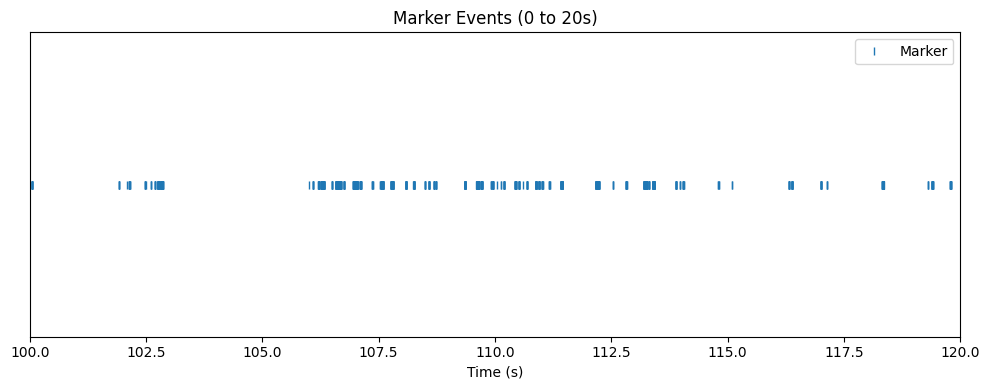

In [16]:
marker = np.load(f'/data1/zhangyuhao/xinchao_data/NP2/{mice}/Marker/run_stop_times_evenRun_odd_Stop.npy')  # unit s
fall_times = np.load(f'/data1/zhangyuhao/xinchao_data/NP2/{mice}/Marker/fall_times.npy')  # unit s
rise_times = np.load(f'/data1/zhangyuhao/xinchao_data/NP2/{mice}/Marker/rise_times.npy')  # unit s
plt.figure(figsize=(10, 4))
plt.plot(marker, np.zeros_like(marker), '|', label='Marker')
plt.xlim(100, 120)
plt.title('Marker Events (0 to 20s)')
plt.xlabel('Time (s)')
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()

# Concate locomotion, Concate static

# Load Raw marker

In [35]:
path = f'/data1/zhangyuhao/xinchao_data/NP2/{mice}/Marker/'
raw_marker = np.load(path + 'motion_marker.npy')
raw_marker = raw_marker[0]

# STFT for specific time segment

In [44]:
#参数设置
fs = 30000  # 30 kHz
start_point = 10000000
end_point = 11000000
start_time = start_point / fs
end_time = end_point / fs
segment = end_time - start_time
traces_trunc = traces[:, start_point:end_point]  # 0-2000000, 2000000-4000000, 4000000-6000000, 6000000-8000000

marker_fs = 10593.2 # marker采样率
nperseg = 30000  # 2秒窗口  ‌窗口长度
noverlap = 15000  # 50%重叠  相邻窗口之间的重叠样本数
# 根据前面FFT的结果确定范围 1.5-5hz 5hz-30hz
freq_low = 5  # 低频截止频率
freq_high = 30  # 高频截止频率
main_path = f'/home/zhangyuhao/Desktop/Result/ET/LFP_STFT/{mice}/'

n_channels, n_samples = traces_trunc.shape[0], traces_trunc.shape[1]  # traces的形状
save_path = main_path + f"{start_time}s-{end_time}s"  # 创建路径
os.makedirs(save_path, exist_ok=True)

for channel in range(n_channels):
    signal = traces_trunc[channel]
    # 计算STFT
    freqs, times, Zxx = stft(signal, fs=fs, nperseg=nperseg, noverlap=noverlap)
    Zxx_db = 20 * np.log10(np.abs(Zxx) + 1e-8)
    
    # 频率掩码
    freq_mask = (freqs >= freq_low) & (freqs <= freq_high)
    freqs_sub = freqs[freq_mask]
    Zxx_sub = Zxx_db[freq_mask, :]

    # 创建画布和子图 gridspec 控制子图高度比例
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(12, 8), sharex=True)
    
    # 绘制频谱图
    im = ax1.pcolormesh(times, freqs_sub, Zxx_sub, shading='gouraud', cmap='inferno',
                        vmin=np.percentile(Zxx_sub, 5), vmax=np.percentile(Zxx_sub, 95))
    #fig.colorbar(im, ax=ax1, pad=0.02, label='Magnitude (dB)')
    ax1.set_xticks(np.arange(0,segment+1,5))  # 设置x轴刻度
    ax1.set_ylim(freq_low, freq_high)
    ax1.set_ylabel('Frequency (Hz)')
    ax1.set_title(f'Channel {channel+1} STFT Spectrogram ({freq_low}-{freq_high} Hz)')
    # for raw marker data
    start_sample = int(start_time * marker_fs)
    end_sample = int(end_time * marker_fs)
    time_axis = np.linspace(0, segment, end_sample - start_sample)  # 创建实际时间坐标
    ax2.plot(time_axis,raw_marker[int(start_time*marker_fs):int(end_time*marker_fs)])  # 没动就是平的，动了才会变化，向上向下分别代表压力传感器的方向
    ax2.set_yticks([])
    ax2.set_xlabel('Time (s)')

    # 调整布局并保存
    plt.tight_layout()
    plt.savefig(os.path.join(save_path, f'channel_{channel}_STFT.png'), dpi=150)
    plt.close()

# STFT enumarate each segment

Processing 0.0s-120.0s


KeyboardInterrupt: 

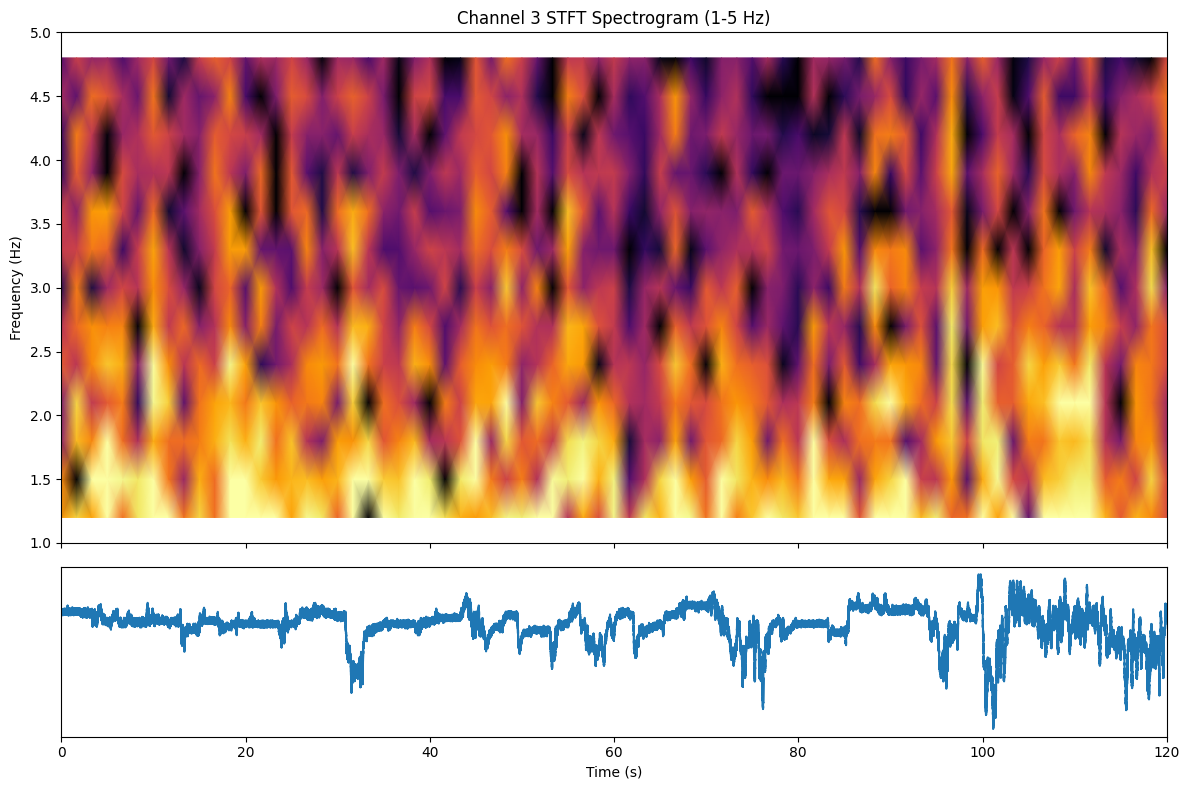

In [ ]:
#参数设置
trunc_time = 120 # unit s
fs = 30000  # ephys采样率
marker_fs = 10593.2 # marker采样率
nperseg = 100000  # 2秒窗口  ‌窗口长度
noverlap = 50000  # 50%重叠  相邻窗口之间的重叠样本数
freq_low = 1  # 低频截止频率
freq_high = 5  # 高频截止频率
main_path = f'/home/zhangyuhao/Desktop/Result/ET/LFP_STFT/{mice}/'

# Main Program
trunc_points = trunc_time * fs  
intervals = traces.shape[1] - traces.shape[1] % trunc_points
for start in range(0, intervals, trunc_points):
    end = start + trunc_points
    traces_trunc = traces[:, start:end] 
    start_time = start / fs
    end_time = end / fs
    print(f"Processing {start_time}s-{end_time}s")
    n_channels, n_samples = traces_trunc.shape[0], traces_trunc.shape[1]  # traces的形状
    save_path = main_path + f"{start_time}s-{end_time}s"  # 创建路径
    os.makedirs(save_path, exist_ok=True)

    for channel in range(n_channels):
        signal = traces_trunc[channel]
        # 计算STFT
        freqs, times, Zxx = stft(signal, fs=fs, nperseg=nperseg, noverlap=noverlap)
        Zxx_db = 20 * np.log10(np.abs(Zxx) + 1e-8)
        
        # 频率掩码
        freq_mask = (freqs >= freq_low) & (freqs <= freq_high)
        freqs_sub = freqs[freq_mask]
        Zxx_sub = Zxx_db[freq_mask, :]

        # 创建画布和子图 gridspec 控制子图高度比例
        fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(12, 8), sharex=True)
        
        # 绘制频谱图
        im = ax1.pcolormesh(times, freqs_sub, Zxx_sub, shading='gouraud', cmap='inferno',
                            vmin=np.percentile(Zxx_sub, 5), vmax=np.percentile(Zxx_sub, 95))
        #fig.colorbar(im, ax=ax1, pad=0.02, label='Magnitude (dB)')
        #ax1.set_xticks(np.arange(0,trunc_time+1,20))  # 设置x轴刻度
        ax1.set_ylim(freq_low, freq_high)
        ax1.set_ylabel('Frequency (Hz)')
        ax1.set_title(f'Channel {channel+1} STFT Spectrogram ({freq_low}-{freq_high} Hz)')
        '''
        # for processed marker data
        event_times = marker[(marker > start_time) & (marker < end_time)]
        event_times = event_times - start_time  # 事件时间相对于当前片段的时间
        ax2.plot(event_times, np.zeros_like(event_times), '|', label='Marker')
        '''
        # for raw marker data
        start_sample = int(start_time * marker_fs)
        end_sample = int(end_time * marker_fs)
        time_axis = np.linspace(0, trunc_time, end_sample - start_sample)  # 创建实际时间坐标
        ax2.plot(time_axis,raw_marker[int(start_time*marker_fs):int(end_time*marker_fs)])  # 没动就是平的，动了才会变化，向上向下分别代表压力传感器的方向
        ax2.set_yticks([])
        ax2.set_xlabel('Time (s)')

        # 调整布局并保存
        plt.tight_layout()
        plt.savefig(os.path.join(save_path, f'channel_{channel}_STFT.png'), dpi=150)
        plt.close()

print("全部处理完成！")

# CWT

In [9]:
# 参数设置（新增CWT相关参数）
trunc_time = 120  # unit s
fs = 30000  # ephys采样率
marker_fs = 10593.2  # marker采样率
wavelet = 'cmor1.5-1.0'  # 复小波更适合时频分析
freq_step = 0.5    # 频率分辨率（Hz），值越小精度越高但计算越慢
freq_low = 0.5  # 低频截止频率
freq_high = 15  # 高频截止频率
main_path = f'/home/zhangyuhao/Desktop/Result/ET/LFP_CWT/{mice}/'

# 预计算优化参数
max_scale = pywt.central_frequency(wavelet) * fs / freq_low
min_scale = pywt.central_frequency(wavelet) * fs / freq_high
scale_step = (max_scale - min_scale) / ((freq_high - freq_low)/freq_step)
scales = np.arange(min_scale, max_scale, scale_step)  # 优化尺度生成

# 多线程参数配置
cwt_kwargs = {'method': 'fft'} if pywt.__version__ >= '1.2' else {}
trunc_points = trunc_time * fs  
intervals = traces.shape[1] - traces.shape[1] % trunc_points
# Main Program（修改信号处理部分）
for start in tqdm(range(0, intervals, trunc_points), desc='Processing segments'):
    end = start + trunc_points
    traces_trunc = traces[:, start:end] 
    start_time = start / fs
    end_time = end / fs
    print(f"Processing {start_time}s-{end_time}s")
    n_channels, n_samples = traces_trunc.shape[0], traces_trunc.shape[1]  # traces的形状
    save_path = main_path + f"{start_time}s-{end_time}s"  # 创建路径
    os.makedirs(save_path, exist_ok=True)

    # 创建内存映射文件（应对大数据）
    memmap_path = os.path.join(save_path, 'cwt_temp.dat')
    cwt_memmap = np.memmap(memmap_path, dtype=np.float32, 
                          mode='w+', shape=(len(scales), trunc_points))
        # 批量处理通道
    for channel in tqdm(range(n_channels), desc='Channels', leave=False):
        signal = traces_trunc[channel]
        
        # 执行优化后的CWT
        coefficients, cwt_freqs = pywt.cwt(
            signal.astype(np.float32),  # 降低精度提升速度
            scales, 
            wavelet,
            sampling_period=1/fs,
            **cwt_kwargs  # 传递额外参数
        )
        
        # 实时计算能量并释放内存
        cwt_power = (np.abs(coefficients)**2).astype(np.float32)
        del coefficients  # 及时释放内存
        
        # 应用频率掩码
        freq_mask = (cwt_freqs >= freq_low) & (cwt_freqs <= freq_high)
        cwt_sub = 10 * np.log10(cwt_power[freq_mask] + 1e-8)
        
        # 存储到内存映射文件
        cwt_memmap[:cwt_sub.shape[0]] = cwt_sub
        
        # 可视化部分（分块处理降低内存消耗）
        for time_chunk in range(0, cwt_sub.shape[1], 10000):
            chunk = cwt_sub[:, time_chunk:time_chunk+10000]
            times_chunk = np.linspace(
                time_chunk/fs, 
                (time_chunk+10000)/fs, 
                chunk.shape[1]
            )
            
            # 创建图形（简化绘图参数）
            fig, ax = plt.subplots(figsize=(12, 4))
            ax.pcolormesh(times_chunk, cwt_freqs[freq_mask], chunk,
                         shading='auto',  # 自动选择渲染方式
                         cmap='viridis',
                         rasterized=True)  # 启用栅格化
            plt.savefig(os.path.join(save_path, f'channel_{channel}_CWT.png'), dpi=150)  # 修改文件名
            plt.close(fig)  # 关闭图形释放内存
            
        # 定期清理内存
        if channel % 10 == 0:
            plt.close('all')
            gc.collect()

Processing segments:   0%|          | 0/13 [00:00<?, ?it/s]

Processing 0.0s-120.0s


Processing segments:   0%|          | 0/13 [02:09<?, ?it/s]


KeyboardInterrupt: 

<Figure size 1200x400 with 0 Axes>